## Part 0. Dataset Preparation
To complete the assignment you will need to download the Cifar10 dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


####Import Libs

In [ ]:
import warnings
import keras as K
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pylab
import pandas as pd 
from collections import Counter

#### Functions

In [ ]:
bin = lambda y,i: (y==i).astype(int)
def getAccuracy(model, x, y):                    
    return model.score(x,y)*100
def plot_sample(X_train, y_train, classes, samples_per_class=7):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1 
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx].astype('uint8'))
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

####Load Data

In [ ]:
random_state = 0
np.random.seed(random_state)
warnings.simplefilter('ignore')
np.set_printoptions(precision=2, suppress=True)
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Five Samples

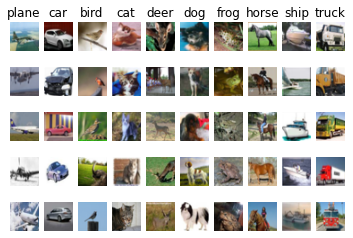

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_sample(X_train, Y_train, classes,5)

## Part 1. k-NN Classifier 
For this section you will implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results



When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values. You can earn __0.5 bonus marks__ if you only need one loop, or __1 bonus mark__ if you can omit for loops for a fully vectorized distance calculation (a maximum of 1 bonus mark is available).




#### Knn Implementation

In [ ]:
class KNearestNeighbor(object):
    
  def __init__(self):
    pass

  def train(self, X, y):
    self.X_train = X
    self.y_train = y
    
  def predict(self, X, k=1):
      dists = self.compute_distances(X)
      return self.predict_labels(dists, k=k)

  def compute_distances(self, X):
    X_train_2 = self.X_train*self.X_train
    X_train_2 = np.sum(X_train_2, axis = 1)
    
    X_train_2_repeat = np.array([X_train_2]*X.shape[0])
    X_2 = X*X
    X_2 = np.sum(X_2, axis = 1)
    X_2_repeat = np.array( [X_2]*self.X_train.shape[0]).transpose()
    X_dot_X_train = X.dot(self.X_train.T)
    
    dists = X_train_2_repeat + X_2_repeat - 2*X_dot_X_train
    dists = np.sqrt(dists)
    return dists

  def predict_labels(self, dists, k=1):
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in range(num_test):
      dists_i = dists[i]
      closest_y = self.y_train[dists_i.argsort()[:k]]
      y_pred[i] = Counter(closest_y.flatten()).most_common(1)[0][0]


    return y_pred

#### Reshaping and Shuffeling the data:

In [ ]:
X_train = np.reshape(X_train,(50000,3072))/255
X_test = np.reshape(X_test,(10000,3072))/255

In [ ]:
def shuffle_train_data(X_train, Y_train): 
   perm = np.random.permutation(len(Y_train)) 
   Xtr_shuf = X_train[perm] 
   Ytr_shuf = Y_train[perm] 
   return Xtr_shuf, Ytr_shuf

In [ ]:
#Shuffle_Data
X_shuffled, Y_shuffled = shuffle_train_data(X_train, Y_train)
Xt_shuffled, Yt_shuffled = shuffle_train_data(X_test, Y_test)
xtr_sa=X_shuffled
ytr_sa=Y_shuffled
xte_sa=Xt_shuffled
yte_sa=Yt_shuffled

#### Take sample from data

In [ ]:
xtr_sa=X_shuffled
ytr_sa=Y_shuffled
xte_sa=Xt_shuffled
yte_sa=Yt_shuffled

In [ ]:
l=[]
accuracies = []
ks = [69,109,149,159,209]
for k in ks:
    kn=KNearestNeighbor()
    kn.train(xtr_sa,ytr_sa) 
    y_pred = kn.predict(xte_sa,k)
    print("Accuracy",accuracy_score(y_pred,yte_sa))
    print("Accuracy",accuracy_score(y_pred,yte_sa),"K",k)
    l.append({"Accuracy":accuracy_score(y_pred,yte_sa),"K":k})

Accuracy 0.3188
Accuracy 0.3188 K 69
Accuracy 0.3103
Accuracy 0.3103 K 109
Accuracy 0.3039
Accuracy 0.3039 K 149
Accuracy 0.3027
Accuracy 0.3027 K 159
Accuracy 0.2966
Accuracy 0.2966 K 209


###### I choose K value of 69 as it achieve the highest accuracy

In [ ]:
df = pd.DataFrame(l)
df

,Accuracy,K
0,0.3188,69
1,0.3103,109
2,0.3039,149
3,0.3027,159
4,0.2966,209


Accuracy 0.3188


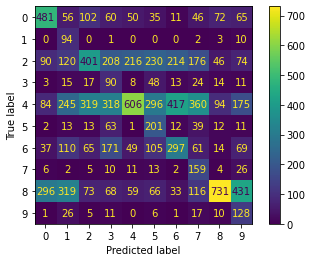

In [ ]:
from sklearn.metrics import accuracy_score
kn.train(xtr_sa,ytr_sa)
y_pred = kn.predict(xte_sa,69)
print("Accuracy",accuracy_score(y_pred,yte_sa))
ConfusionMatrixDisplay(confusion_matrix(y_pred, yte_sa)).plot()

**K Value = 69 that has the best accuracy with acceptable tradeoff image.png where low varriance and low bias**

## Part 2. Logistic Regression

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

###### Preparing for the One VS Rest

In [ ]:
d = {"yb{0}".format(i) : bin(ytr_sa, i) for i in range(10) }
d0 = {"yb{0}".format(i) : bin(yte_sa, i) for i in range(10) }

In [ ]:
X = X_shuffled.reshape(50000, 3*32*32)
Xt = Xt_shuffled.reshape(10000, 3*32*32)

###### Logisitic Regression

One VS Rest Class : 0
Accuracy =  90.96
One VS Rest Class : 1
Accuracy =  91.19
One VS Rest Class : 2
Accuracy =  89.92999999999999
One VS Rest Class : 3
Accuracy =  89.89
One VS Rest Class : 4
Accuracy =  89.89
One VS Rest Class : 5
Accuracy =  90.19
One VS Rest Class : 6
Accuracy =  90.29
One VS Rest Class : 7
Accuracy =  90.81
One VS Rest Class : 8
Accuracy =  90.63
One VS Rest Class : 9
Accuracy =  90.57


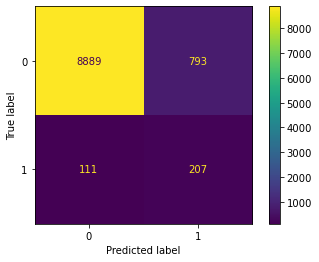

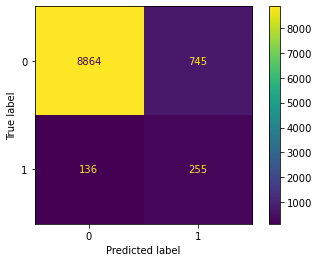

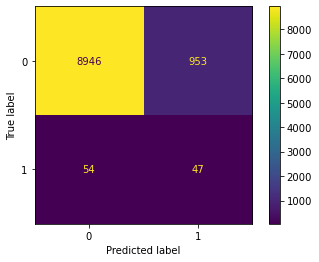

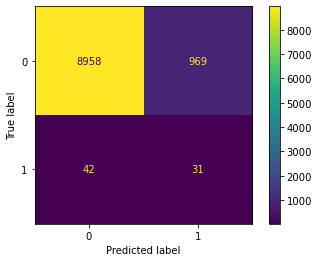

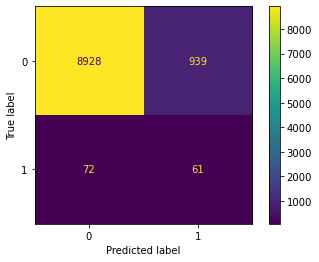

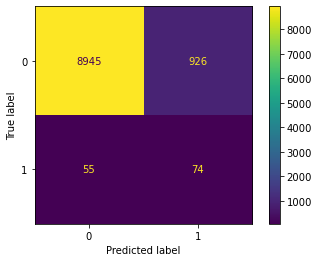

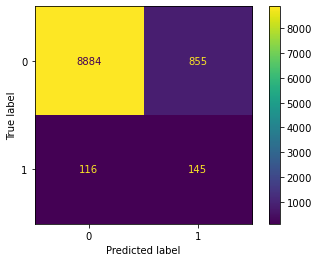

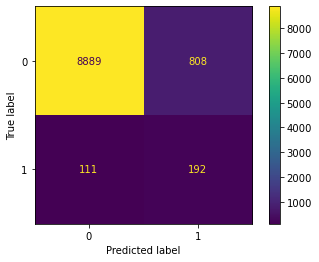

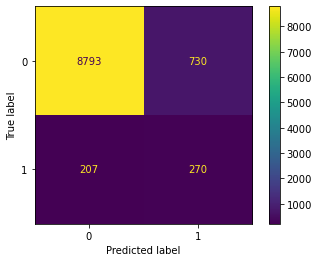

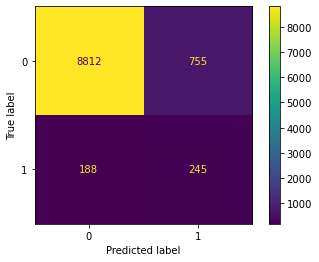

In [ ]:
z=0
allpred=[]
clf_1 = LogisticRegression()
for key, value in d.items():
  clf_1.fit(X, d[key])
  y_pred=clf_1.predict(Xt)
  print('One VS Rest Class : {:}'.format(z))
  print("Accuracy = ",getAccuracy(clf_1, Xt, d0[key]))
  ConfusionMatrixDisplay(confusion_matrix(y_pred, d0[key])).plot()
  yb1_pred = clf_1.predict_proba(Xt)[:,1].reshape(-1,1)
  allpred.append(yb1_pred)
  z=z+1

###### Argmax all experiments 

ArgMax Accuracy One VS Rest 40.150000000000006


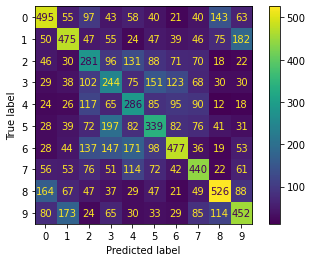

In [ ]:
yb_all=np.hstack(allpred)
yb_last=np.argmax(yb_all, axis=1)
print("ArgMax Accuracy One VS Rest",accuracy_score(yb_last,yte_sa)*100)
ConfusionMatrixDisplay(confusion_matrix(yb_last, yte_sa)).plot()

## Part 3. Support Vector Machine (SVM) Classification 

In Part 3. you will use Scikit-learn to perform classification, again on the Cifar10 dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.


Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

Base Line Accuracy

In [ ]:
svc=LinearSVC(multi_class="ovr",random_state=0)
svc.fit(X,ytr_sa)
ypredsvcc=svc.predict(Xt)
print("Base Line Accuracy : ",accuracy_score(ypredsvcc,yte_sa)*100)

Base Line Accuracy :  26.400000000000002


Effect of Cost Parameters on the Accuracy

In [ ]:
accsvccost=[]
y_exp1_conf_mat=[]
for cost in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]:
    svc=LinearSVC(multi_class="ovr",random_state=0 , C=cost,dual=False)
    svc.fit(X,ytr_sa)
    ypredsvcc=svc.predict(Xt)
    y_exp1_conf_mat.append(ypredsvcc)
    print("Cost = ",cost)
    accsvccost.append(accuracy_score(ypredsvcc,yte_sa)*100)
    print("Linear SVC Accuracy",accuracy_score(ypredsvcc,yte_sa)*100)

Cost =  0.0001
Linear SVC Accuracy 32.0
Cost =  0.001
Linear SVC Accuracy 36.6
Cost =  0.01
Linear SVC Accuracy 32.2
Cost =  0.1
Linear SVC Accuracy 28.4
Cost =  1
Linear SVC Accuracy 25.6
Cost =  10
Linear SVC Accuracy 24.4
Cost =  100
Linear SVC Accuracy 24.6


Plot Cost VS Accuracy

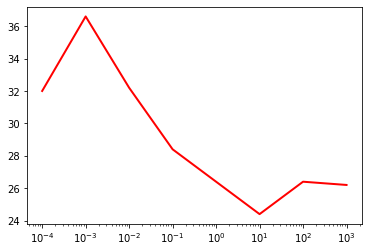

In [ ]:

c =  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(c, accsvccost,color='red', lw=2)
ax.set_xscale('log')
pylab.show()

Cost with Regularization term

In [ ]:
accsvcreg=[]
y_exp2_conf_mat=[]
for cost in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]:
    svc=LinearSVC(multi_class="ovr",random_state=0 , C=cost,penalty="l1",dual=False)
    svc.fit(X,ytr_sa)
    ypredsvcr=svc.predict(Xt)
    y_exp2_conf_mat.append(ypredsvcr)
    print("Cost = ",cost)
    accsvcreg.append(accuracy_score(ypredsvcr,yte_sa)*100)
    print("Linear SVC Accuracy",accuracy_score(ypredsvcr,yte_sa)*100)

Cost =  0.0001
Linear SVC Accuracy 8.799999999999999
Cost =  0.001
Linear SVC Accuracy 11.200000000000001
Cost =  0.01
Linear SVC Accuracy 24.0
Cost =  0.1
Linear SVC Accuracy 35.4
Cost =  1
Linear SVC Accuracy 26.6
Cost =  10
Linear SVC Accuracy 24.0
Cost =  100
Linear SVC Accuracy 24.6
Cost =  1000
Linear SVC Accuracy 24.6


Plot Cost VS Accuracy after adding the regularization term

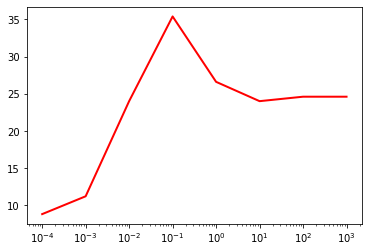

In [ ]:

c =  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(c, accsvcreg,color='red', lw=2)
ax.set_xscale('log')
pylab.show()

Cost and gamma with kernel

In [ ]:
# Run your SVM experiments here.
svcacc=[]
y_exp3_conf_mat=[]
gmma=[0.01, 0.1, 1, 10, 100]
cost=[0.01, 0.1, 1, 10, 100]
for c in cost:
    for g in gmma:
        sv=SVC(kernel="rbf",C=c,gamma=g,random_state=0)
        sv.fit(X,ytr_sa)
        ypredsvcf=sv.predict(Xt)
        print("Cost = ",c,"Gamma = ", g)
        y_exp3_conf_mat.append(ypredsvcf)
        svcacc.append(accuracy_score(ypredsvcf,yte_sa)*100)
        print("SVC Accuracy",accuracy_score(ypredsvcf,yte_sa)*100)

Cost =  0.01 Gamma =  0.01
SVC Accuracy 44.800000000000004
Cost =  0.01 Gamma =  0.1
SVC Accuracy 38.4
Cost =  0.01 Gamma =  1
SVC Accuracy 38.3
Cost =  0.01 Gamma =  10
SVC Accuracy 38.3
Cost =  0.01 Gamma =  100
SVC Accuracy 38.3
Cost =  0.1 Gamma =  0.01
SVC Accuracy 42.199999999999996
Cost =  0.1 Gamma =  0.1
SVC Accuracy 38.3
Cost =  0.1 Gamma =  1
SVC Accuracy 38.3
Cost =  0.1 Gamma =  10
SVC Accuracy 38.3
Cost =  0.1 Gamma =  100
SVC Accuracy 38.3
Cost =  1 Gamma =  0.01
SVC Accuracy 39.1
Cost =  1 Gamma =  0.1
SVC Accuracy 38.3
Cost =  1 Gamma =  1
SVC Accuracy 38.3
Cost =  1 Gamma =  10
SVC Accuracy 38.3
Cost =  1 Gamma =  100
SVC Accuracy 38.3
Cost =  10 Gamma =  0.01
SVC Accuracy 38.4
Cost =  10 Gamma =  0.1
SVC Accuracy 38.3
Cost =  10 Gamma =  1
SVC Accuracy 38.3
Cost =  10 Gamma =  10
SVC Accuracy 38.3
Cost =  10 Gamma =  100
SVC Accuracy 38.3
Cost =  100 Gamma =  0.01
SVC Accuracy 38.3
Cost =  100 Gamma =  0.1
SVC Accuracy 38.3
Cost =  100 Gamma =  1
SVC Accuracy 38.3
Co

In [ ]:
gmma=[0.01, 0.1, 1, 10, 100]
cost=[0.01, 0.1, 1, 10, 100]
gc=[]
for c in cost:
    for g in gmma:
        gc.append({"cost":c,"gamma":g})
dfd=pd.DataFrame(gc)
dfd["Accuracy"]=svcacc

In [ ]:
dfd

,cost,gamma,Accuracy
0,0.01,0.01,44.8
1,0.01,0.10,38.4
2,0.01,1.00,38.3
3,0.01,10.00,38.3
4,0.01,100.00,38.3
5,0.10,0.01,42.2
6,0.10,0.10,38.3
7,0.10,1.00,38.3
8,0.10,10.00,38.3
9,0.10,100.00,38.3


accuracy under diffirent values of cost and gamma 

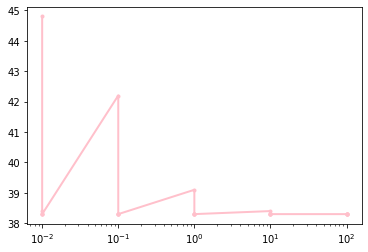

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(dfd["cost"], svcacc,".-",color='pink', lw=2)    
ax.set_xscale('log')
pylab.show()

Confusion Matrix and classification report for the champion model 

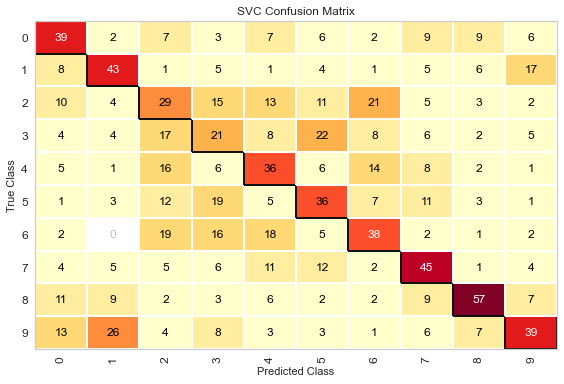

<AxesSubplot:title={'center':'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:

from yellowbrick.classifier import ConfusionMatrix


cm = ConfusionMatrix(sv, classes=[0,1,2,3,4,5,6,7,8,9])
cm.fit(X[:10000], ytr_sa[:10000])
cm.score(Xt[:1000], yte_sa[:1000])

cm.show()

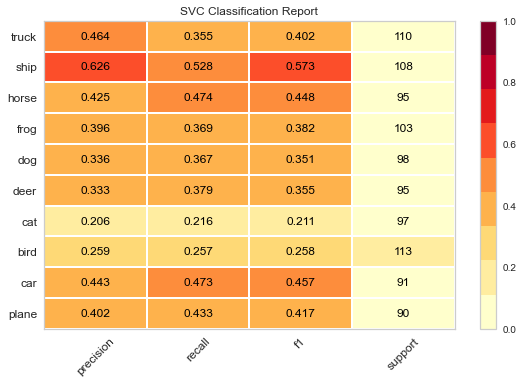

<AxesSubplot:title={'center':'SVC Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(sv, classes=classes, support=True)
visualizer.fit(X[:10000], ytr_sa[:10000])       
visualizer.score(Xt[:1000], yte_sa[:1000])        
visualizer.show()   

Disscusion

Compare the performance of the models in terms of the following criteria: precision, recall, accuracy, F-measure.

high F-score can be the result of an imbalance between Precision and Recall  >>>>>>> SVM champ model

The model maximizes the number of True Positives But it could be wrong sometimes!    >>>>>> Logistic Regression 

the classifier is very conservative - does not risk too much in saying that a sample is Positive.  >>>>  KNN